In [17]:
%reload_kedro

[10/20/23 17:15:16] INFO     Resolved project path as: /home/jamontanac/Documents/Procesamiento     ]8;id=868941;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=388131;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             Imagenes y video/Fighting-Illutions.                                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/20/23 17:15:16] WARNING  /home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site ]8;id=912061;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=548750;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             -packages/kedro/framework/project/__init__.py:359: UserWarning: An                    
                             error occurred while importing the                                                    
                             'Fighting-Illutions.pipelines.generate_adversarial_examples' module.                  
                             Nothing defined therein will be returned by 'find_pipelines'.                         
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "/home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/sit                
                             e-packages/kedro/framework/project/__init__.py", line 357, in                         
                             find_pipelines                                                                        
                                 pipeline_module = importlib.import_module(pipeline_module_name)                   
                               File                                                                                
                             "/home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/imp                
                             ortlib/__init__.py", line 126, in import_module                                       
                                 return _bootstrap._gcd_import(name[level:], package, level)                       
                               File "<frozen importlib._bootstrap>", line 1050, in _gcd_import                     
                               File "<frozen importlib._bootstrap>", line 1027, in _find_and_load                  
                               File "<frozen importlib._bootstrap>", line 1006, in                                 
                             _find_and_load_unlocked                                                               
                               File "<frozen importlib._bootstrap>", line 688, in _load_unlocked                   
                               File "<frozen importlib._bootstrap_external>", line 883, in                         
                             exec_module                                                                           
                               File "<frozen importlib._bootstrap>", line 241, in                                  
                             _call_with_frames_removed                                                             
                               File "/home/jamontanac/Documents/Procesamiento Imagenes y                           
                             video/Fighting-Illutions/src/Fighting-Illutions/pipelines/generate_adv                
                             ersarial_examples/__init__.py", line 6, in <module>                                   
                                 from .pipeline import create_pipeline                                             
                               File "/home/jamontanac/Documents/Procesamiento Imagenes y                           
                             video/Fighting-Illutions/src/Fighting-Illutions/pipelines/generate_adv                
                             ersarial_examples/pipeline.py", line 14, in <module>                                  
                                 parameters = conf_loader["parameters"

[10/20/23 17:15:17] INFO     Kedro project Fighting Illutions                                       ]8;id=170798;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=862600;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=791914;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=602751;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=518201;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=808149;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from sklearn.metrics import confusion_matrix
import torch
import torchvision
import torchvision.transforms as transforms
import cv2
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


In [3]:

def Create_data_loader(batch_size=128)-> torch.utils.data.DataLoader:

    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    testset = torchvision.datasets.CIFAR10(
        root='./data/01_raw', train=False, download=True, transform=transform_test)
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=False, num_workers=2)
    return testloader


def resize_pad(image, ratio=0.8):
    """
    Resizes and pads an image with zeros to match the original size.

    Args:
        image (numpy.ndarray): The input image to resize and pad.
        ratio (float): The ratio to resize the image by (default 0.8).

    Returns:
        torch.Tensor: The resized and padded image.
    """
    original = image.numpy().transpose((1, 2, 0))
    old_size = original.shape[:2]
    new_size = int(old_size[0] * ratio)
    img = cv2.resize(original, (new_size, new_size))
    max_y = old_size[0] - new_size
    max_x = old_size[1] - new_size
    start_y = np.random.randint(0, max_y)
    start_x = np.random.randint(0, max_x)
    pad = np.zeros_like(original)
    pad[start_y:start_y + new_size, start_x:start_x + new_size] = img
    pad = cv2.flip(pad, 1)
    return torch.from_numpy(pad.transpose((2, 0, 1))).float()

def random_distortion(h, w, d, delta):
    """
    Returns distorted coordinates
    """
    nw = w // d
    nh = h // d
    distorted_coords = torch.zeros(nh+1, nw+1, 2)
    
    for m in range(nw+1):
        for n in range(nh+1):
            dx = (torch.rand(1) * 2 - 1) * delta  
            dy = (torch.rand(1) * 2 - 1) * delta 
            x = m * d + dx
            y = n * d + dy
            distorted_coords[n, m, 0] = x
            distorted_coords[n, m, 1] = y
            
    return distorted_coords


def image_distortion(img, d=4, delta=0.5):
    """
    Apply distortion to a given image.
    img: a tensor of shape (C, H, W)
    d: size of the grid
    delta: distortion limit
    """
    C, H, W = img.shape
    nw = W // d
    nh = H // d
    distorted_coords = random_distortion(H, W, d, delta)
    distorted_image = torch.zeros_like(img)
    
    for m in range(nw+1):
        for n in range(nh+1):
            src_x = m * d
            src_y = n * d
            dest_x = int(distorted_coords[n, m, 0].item())
            dest_y = int(distorted_coords[n, m, 1].item())
            for i in range(d+1):
                for j in range(d+1):
                    if src_y + j < H and src_x + i < W and dest_y + j < H and dest_x + i < W:
                        distorted_image[:, dest_y + j, dest_x + i] = img[:, src_y + j, src_x + i]
                        
    return distorted_image



class AdversarialDataset(Dataset):
    def __init__(self, data_dict, transform=None):
        """
        Args:
            data_dict (dict): Dictionary containing adversarial data.
            transform (callable, optional): Optional transform to be applied on the examples.
        """
        self.data_dict = data_dict
        self.transform = transform

    def __len__(self):
        return len(self.data_dict["real_labels"])

    def __getitem__(self, idx):
        sample = {key: value[idx] for key, value in self.data_dict.items()}
        if self.transform:
            sample["examples"] = self.transform(sample["examples"])
        return sample
class ResizePadTransform:
    def __init__(self, ratio=0.8):
        self.ratio = ratio

    def __call__(self, image):
        return resize_pad(image, ratio=self.ratio)
class DistortTransform:
    def __init__(self, d=4, delta=0.5):
        self.d = d
        self.delta = delta
        
    def __call__(self, img):
        return image_distortion(img, self.d, self.delta)

def init_model(model:torch.nn.Module)->torch.nn.Module:
    # Move model to GPU if available
    model = model.to(device)
    if device == 'cuda':
        model= torch.nn.DataParallel(model)
        cudnn.benchmark = True
    return model

In [17]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
attacks = ["DeepFool", "CarliniL2", "FSGM", "PGD"]
models = ['Resnet_model','Regnet_x_model','Regnet_y_model']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for model_ref in models:
    model = catalog.load(f"{model_ref}")
    for attack in attacks:
        adver = catalog.load(f'{model_ref}_Adversarial_{attack}@Dataset')
        # Create the dataset
        transform_fn = ResizePadTransform(ratio=0.9)
        dataset = AdversarialDataset(adver, transform=transform_fn)
        # Create the DataLoader
        batch_size = 512  # or any other desired batch size
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        model_classifier= init_model(model)
        model_classifier.eval()# we ran only inference for tested data
        correct_defense = 0
        correct_model = 0
        correct_adversarial = 0
        total = 0
        confidence_defence = []
        for batch in dataloader:
            # Assuming model is your pre-trained model
            images, real_labels  = batch["examples"], batch["real_labels"]
            model_labels, adversarial_labels = batch["model_labels"], batch["adversarial_labels"]
            images, real_labels = images.to(device), real_labels.to(device)
            model_labels, adversarial_labels =model_labels.to(device), adversarial_labels.to(device)
            with torch.no_grad():
                outputs = model_classifier(images)
                _, predicted= torch.max(outputs.data, 1)
                confidence_defence.extend(F.softmax(outputs, dim=1).max(dim=1)[0].cpu().numpy())
                total += real_labels.size(0)
                correct_defense += (predicted == real_labels).sum().item()
                correct_model += (model_labels == real_labels).sum().item()
                correct_adversarial += (adversarial_labels == real_labels).sum().item()
        original_accuracy = correct_model *100 /total
        adversarial_accuracy = correct_adversarial *100 /total
        defense_accuracy = correct_defense *100 /total
        # acc = 100*correct/total
        print(original_accuracy, adversarial_accuracy, defense_accuracy)


[10/20/23 21:46:37] INFO     Loading data from 'Resnet_model' (PytorchDatasetModel)...          ]8;id=425747;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=872690;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=540661;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=815058;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 9.71 26.61


[10/20/23 21:46:40] INFO     Loading data from 'Resnet_model_Adversarial_CarliniL2@Dataset'     ]8;id=982742;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=131500;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 61.33 27.18


[10/20/23 21:46:42] INFO     Loading data from 'Resnet_model_Adversarial_FSGM@Dataset'          ]8;id=236783;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=465058;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 67.66 27.31


[10/20/23 21:46:45] INFO     Loading data from 'Resnet_model_Adversarial_PGD@Dataset'           ]8;id=203292;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=453990;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 70.22 27.67


[10/20/23 21:46:48] INFO     Loading data from 'Regnet_x_model' (PytorchDatasetModel)...        ]8;id=608111;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=980124;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Regnet_x_model_Adversarial_DeepFool@Dataset'    ]8;id=393869;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=445041;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

80.98 12.42 24.0


[10/20/23 21:46:51] INFO     Loading data from 'Regnet_x_model_Adversarial_CarliniL2@Dataset'   ]8;id=440742;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=103227;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

80.98 46.23 24.06


[10/20/23 21:46:54] INFO     Loading data from 'Regnet_x_model_Adversarial_FSGM@Dataset'        ]8;id=714342;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=270897;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

80.98 57.14 24.04


[10/20/23 21:46:58] INFO     Loading data from 'Regnet_x_model_Adversarial_PGD@Dataset'         ]8;id=32871;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=608562;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

80.98 57.08 24.48


[10/20/23 21:47:01] INFO     Loading data from 'Regnet_y_model' (PytorchDatasetModel)...        ]8;id=518097;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=348655;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Regnet_y_model_Adversarial_DeepFool@Dataset'    ]8;id=860263;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=412568;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 9.71 27.06


[10/20/23 21:47:04] INFO     Loading data from 'Regnet_y_model_Adversarial_CarliniL2@Dataset'   ]8;id=828300;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=485290;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 61.34 27.68


[10/20/23 21:47:06] INFO     Loading data from 'Regnet_y_model_Adversarial_FSGM@Dataset'        ]8;id=867964;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=406681;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 67.66 27.51


[10/20/23 21:47:09] INFO     Loading data from 'Regnet_y_model_Adversarial_PGD@Dataset'         ]8;id=767364;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=926075;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 70.32 27.54


[10/20/23 22:00:49] INFO     Loading data from 'Resnet_model' (PytorchDatasetModel)...          ]8;id=227734;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=326831;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=634586;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=76922;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

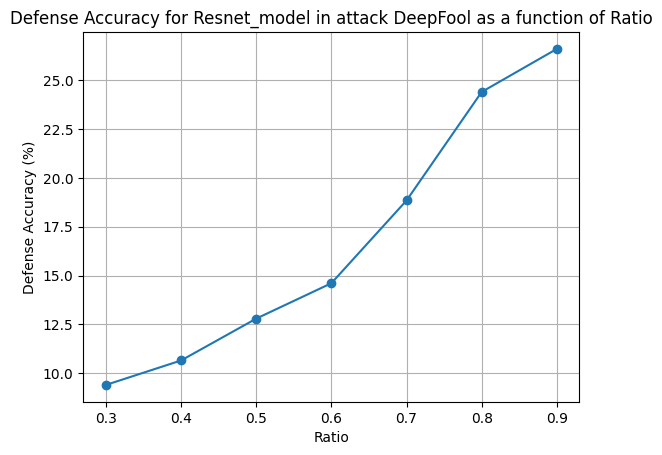

[10/20/23 22:04:11] INFO     Loading data from 'Resnet_model' (PytorchDatasetModel)...          ]8;id=703142;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=748989;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=187138;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=859910;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:04:31] INFO     Loading data from 'Resnet_model_Adversarial_CarliniL2@Dataset'     ]8;id=352069;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=685343;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:04:51] INFO     Loading data from 'Resnet_model_Adversarial_FSGM@Dataset'          ]8;id=676857;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=479048;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:05:11] INFO     Loading data from 'Resnet_model_Adversarial_PGD@Dataset'           ]8;id=848425;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=127225;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:05:32] INFO     Loading data from 'Regnet_x_model' (PytorchDatasetModel)...        ]8;id=211869;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=235528;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Regnet_x_model_Adversarial_DeepFool@Dataset'    ]8;id=301864;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=686828;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:05:58] INFO     Loading data from 'Regnet_x_model_Adversarial_CarliniL2@Dataset'   ]8;id=119036;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=498376;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:06:25] INFO     Loading data from 'Regnet_x_model_Adversarial_FSGM@Dataset'        ]8;id=175463;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=701338;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:06:51] INFO     Loading data from 'Regnet_x_model_Adversarial_PGD@Dataset'         ]8;id=250776;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=261455;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:07:18] INFO     Loading data from 'Regnet_y_model' (PytorchDatasetModel)...        ]8;id=736255;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=416662;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Regnet_y_model_Adversarial_DeepFool@Dataset'    ]8;id=625236;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=207605;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:07:38] INFO     Loading data from 'Regnet_y_model_Adversarial_CarliniL2@Dataset'   ]8;id=101844;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=343614;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:07:58] INFO     Loading data from 'Regnet_y_model_Adversarial_FSGM@Dataset'        ]8;id=692381;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=173806;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:08:18] INFO     Loading data from 'Regnet_y_model_Adversarial_PGD@Dataset'         ]8;id=236538;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=495897;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

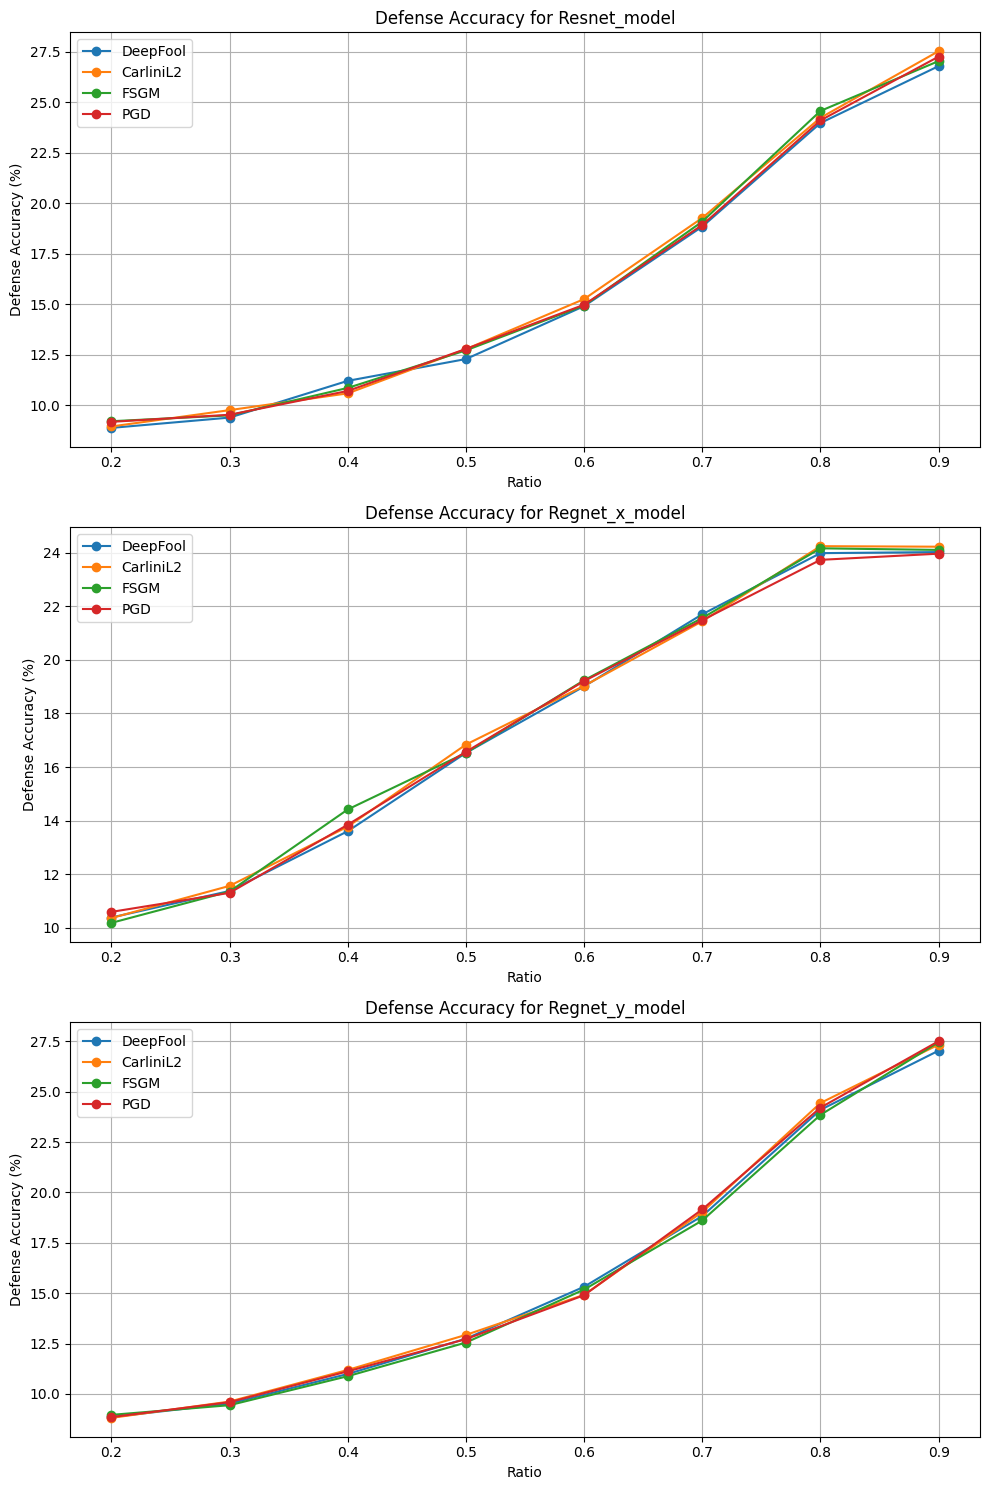

In [22]:
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
attacks = ["DeepFool", "CarliniL2", "FSGM", "PGD"]
models = ['Resnet_model','Regnet_x_model','Regnet_y_model']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Introduce a set of ratio values to iterate over
ratios = [i/10.0 for i in range(2, 10)]

# Create a dictionary to store defense accuracies for each combination of model and attack
results = {}

for model_ref in models:
    model = catalog.load(f"{model_ref}")
    
    results[model_ref] = {}
    
    for attack in attacks:
        adver = catalog.load(f'{model_ref}_Adversarial_{attack}@Dataset')
        defense_accuracies = []

        for ratio in ratios:
            transform_fn = ResizePadTransform(ratio=ratio)
            dataset = AdversarialDataset(adver, transform=transform_fn)

            batch_size = 512
            dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
            model_classifier = init_model(model)
            model_classifier.eval()
            correct_defense = 0
            total = 0

            for batch in dataloader:
                images, real_labels = batch["examples"], batch["real_labels"]
                images, real_labels = images.to(device), real_labels.to(device)
                with torch.no_grad():
                    outputs = model_classifier(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += real_labels.size(0)
                    correct_defense += (predicted == real_labels).sum().item()

            defense_accuracy = correct_defense * 100 / total
            defense_accuracies.append(defense_accuracy)

        results[model_ref][attack] = defense_accuracies

# Plot the results
fig, axs = plt.subplots(len(models), 1, figsize=(10, 15))
for i, model_ref in enumerate(models):
    for attack in attacks:
        axs[i].plot(ratios, results[model_ref][attack], label=attack, marker='o', linestyle='-')
    axs[i].set_xlabel('Ratio')
    axs[i].set_ylabel('Defense Accuracy (%)')
    axs[i].set_title(f'Defense Accuracy for {model_ref}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [14]:

model_classifier= init_model(model)
model_classifier.eval()
correct = 0
total = 0
for batch in dataloader:
    # Assuming model is your pre-trained model
    images, real_labels  = batch["examples"], batch["real_labels"] 
    images, real_labels = images.to(device), real_labels.to(device)
    with torch.no_grad():
        outputs = model_classifier(images)
        _, predicted= torch.max(outputs.data, 1)
        total += real_labels.size(0)
        correct+= (predicted == real_labels).sum().item()
acc = 100*correct/total

        

In [15]:
acc

26.95

In [33]:
model_classifier.


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 